<a href="https://colab.research.google.com/github/davidbrown2324/Colabratory_Workshop/blob/master/SplitChannelsClearly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Upload a tiff file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Well07_008_z7.tif to Well07_008_z7.tif
User uploaded file "Well07_008_z7.tif" with length 2145384 bytes


In [0]:
import skimage.io as io
io.use_plugin('tifffile')

In [0]:
im=io.imread('Well07_008_z7.tif')

In [0]:
import matplotlib.pyplot as plt

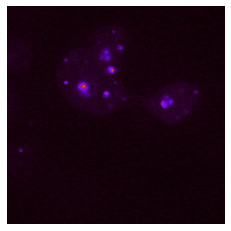

In [8]:
#Try showing the 1st channel
plt.imshow(im[:,:,0], cmap='gnuplot');
plt.axis('off');

In [9]:
## Count channels?
channels = im.shape[-1]
channels

4

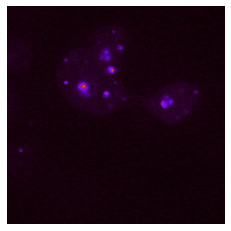

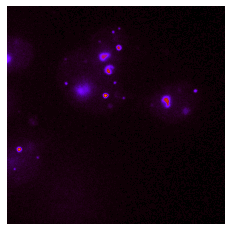

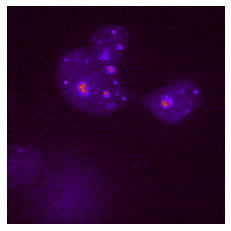

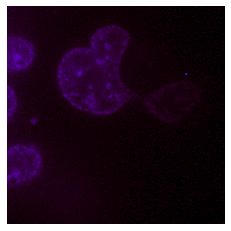

In [14]:
## show each channel
for channel in range(channels):
  plt.imshow(im[:,:,channel], cmap='gnuplot');
  plt.axis('off');
  plt.show();

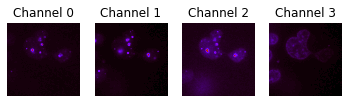

In [22]:
fig, axes = plt.subplots(1,4)

for channel in range(channels):
  axes[channel].imshow(im[:,:,channel], cmap='gnuplot');
  axes[channel].axis('off');
  axes[channel].set_title('Channel '+str(channel));

In [0]:
# channel_names = ['Halo-FBL1', 'mCherry-NPM1', 'eGFP-KDM5A_variant', 'DAPI']
channel_colours = ['red', 'magenta', 'green', 'cyan']
channel_cmaps = ['Reds_r', 'Oranges_r', 'Greens_r', 'Blues_r']

Can we get the channel names from the .tif metadata?

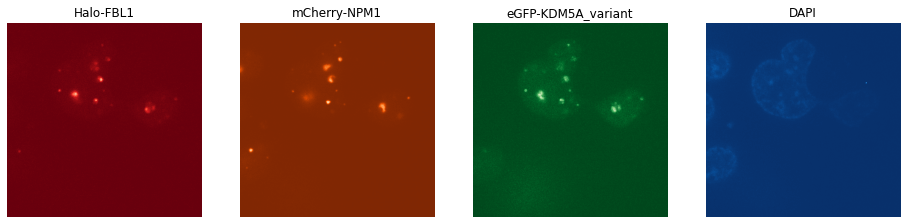

In [44]:
fig, axes = plt.subplots(1,4, figsize=(16,8))

for channel in range(channels):
  axes[channel].imshow(im[:,:,channel], cmap=channel_cmaps[channel]);
  axes[channel].axis('off');
  axes[channel].set_title(channel_names[channel]);

Can we add autocontrast?

We need the ImageJ style LUTs

In [0]:
from matplotlib.colors import LinearSegmentedColormap

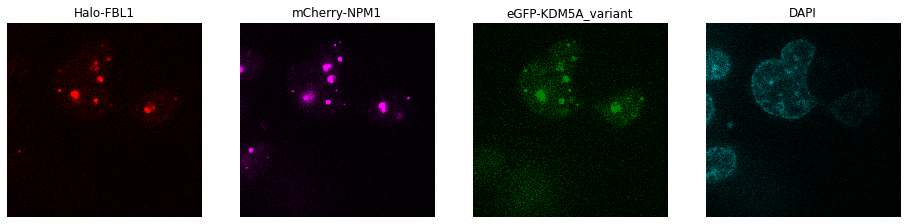

In [73]:
fig, axes = plt.subplots(1,4, figsize=(16,8))

for channel in range(channels):

  #Normalise data to full range of values in image.
  normalized = plt.Normalize(im[:,:,channel].min(), im[:,:,channel].max())

  #Generate a convenience colour map, from black to the chosen channel colour.
  cmap = LinearSegmentedColormap.from_list('mycmap', ['black', channel_colours[channel]])

  axes[channel].imshow(im[:,:,channel], cmap=cmap, interpolation='nearest', norm=normalized);
  axes[channel].axis('off');
  axes[channel].set_title(channel_names[channel]);

Let's try a Yosemite Image


In [3]:
#Upload file and it's metadata.txt file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0.ome.tif to Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0.ome.tif
Saving Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0_metadata.txt to Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0_metadata.txt
User uploaded file "Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0.ome.tif" with length 16821237 bytes
User uploaded file "Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0_metadata.txt" with length 30314 bytes


In [14]:
uploaded.keys() 

dict_keys(['Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0.ome.tif', 'Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0_metadata.txt'])

In [20]:
tuple(uploaded.keys())

SyntaxError: ignored

In [22]:
for key in uploaded.keys():
  if 'metadata.txt' in key:
    print(key)

Well01_HeLa+TU0_pRPL30-eGFP-flSV40late_1_MMStack_Pos0_metadata.txt


In [0]:
import json

In [0]:
#Get the metadata. MicroManager metadata is a JSON file.
file = key

with open(file, 'r') as f:
     meta = json.loads(f.read()) #meta is a JsonDict

In [47]:
#Get the channel names
channel_names = meta['Summary']['ChNames']

## Count channels


#Get channel colours
channel_colors_on_scope = meta['Summary']['ChColors']
channel_colors_on_scope

[-16724992, -1]

Your colours are indeed RGB values stored in a slightly twisted way. All you have to do is, take the decimal number away from 16777216 and convert to HEX.

16777216-1 = 16777215 (FFFFFFh = White)

16777216-12582784 = 4194432 (400080h = Purple)

16777216-65408 = 16711808 (FF0080h = Pink)

16777216-16777216 = 0 (000000h = Black)

16777216-256 = 16776960 (FFFF00h = Yellow)

In [74]:
hex_codes = list()
for code in channel_colors_on_scope:
  new_code = hex(16777216-code).replace('0x1', '#')

  #replace black with white
  if new_code == '#000001':
    new_code = '#ffffff'

  hex_codes.append(new_code)

hex_codes

['#ff3400', '#ffffff']

In [0]:
def loadYosemite(tif_filename, metadata_filename):

  #Read metadata
  with open(metadata_filename, 'r') as f:
     meta = json.loads(f.read()) #meta is a JsonDict

  #Read image
  im=io.imread(tif_filename)

  return im, meta

In [0]:
im, meta = loadYosemite(*tuple(uploaded.keys()))

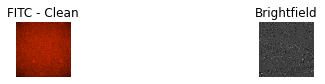

In [75]:
nrows = 1 
cols  = channels

## Count channels?
channels = len(channel_names)

fig, axes = plt.subplots(nrows, cols, figsize=(4*cols, nrows))

for channel in range(channels):

  #Normalise data to full range of values in image.
  normalized = plt.Normalize(im[channel,:,:].min(), im[channel,:,:].max())

  #Generate a convenience colour map, from black to the chosen channel colour.
  cmap = LinearSegmentedColormap.from_list('mycmap', ['black', hex_codes[channel]])

  axes[channel].imshow(im[channel,:,:], cmap=cmap, interpolation='nearest', norm=normalized);
  axes[channel].axis('off');
  axes[channel].set_title(channel_names[channel]);

Do a better job of auto contrasting

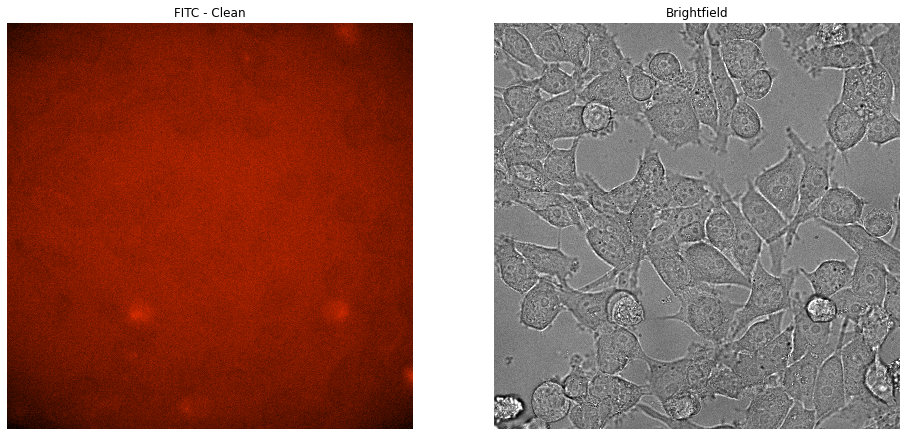

In [78]:
nrows = 1 
cols  = channels

## Count channels?
channels = len(channel_names)

fig, axes = plt.subplots(nrows, cols, figsize=(8*cols, 8*nrows))

for channel in range(channels):

  #Normalise data to full range of values in image.

  image_mean = im[channel,:,:].mean()
  image_std  = im[channel,:,:].std()

  normalized = plt.Normalize(image_mean-5*image_std, image_mean+5*image_std)

  #Generate a convenience colour map, from black to the chosen channel colour.
  cmap = LinearSegmentedColormap.from_list('mycmap', ['black', hex_codes[channel]])

  axes[channel].imshow(im[channel,:,:], cmap=cmap, interpolation='nearest', norm=normalized);
  axes[channel].axis('off');
  axes[channel].set_title(channel_names[channel]);